<a href="https://colab.research.google.com/github/avani0110/ML_Assignemnt_1/blob/main/ML_Assignment_142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

160123737142

Datasets used:

1. wine dataset

2. linear:california housing
  
   logistic: breastcancer

**(a) Load the data into memory. Make an appropriate X matrix and y vector**.

In [2]:

from sklearn.datasets import load_wine
import numpy as np

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target  # X = feature matrix, y = labels
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (178, 13)
Shape of y: (178,)


Explanation:
We use the Wine dataset from scikit-learn, which contains 178 samples of wine, each described by 13 chemical features such as alcohol, acidity, flavanoids, etc. The target variable y has three possible classes (wine categories).
Here:

X → feature matrix of size (178, 13)

y → class labels (0, 1, or 2).

**(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).**

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (142, 13) Test size: (36, 13)


Explanation:
We split the dataset into 80% training and 20% testing.

The training set is used to fit the model.

The testing set checks how well the model generalizes.
We use stratified sampling so that the class proportions are the same in both sets (this prevents imbalance where one class might be missing from the test set).

**(c) Give the objective of logistic regression with L2 regularization.**

In [ ]:


# L(w) = - Σ [ y_i log(p_i) + (1 - y_i) log(1 - p_i) ] + λ ||w||²


Explanation:
The goal of logistic regression is to minimize cross-entropy loss.

The first term measures how well predictions match true labels.

The second term, λ||w||², is the L2 penalty, which discourages large weights.

Effect:

Without regularization (λ=0), the model may overfit, especially with many features.

With larger λ, the model becomes simpler (weights shrink), which reduces variance but increases bias.

**(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

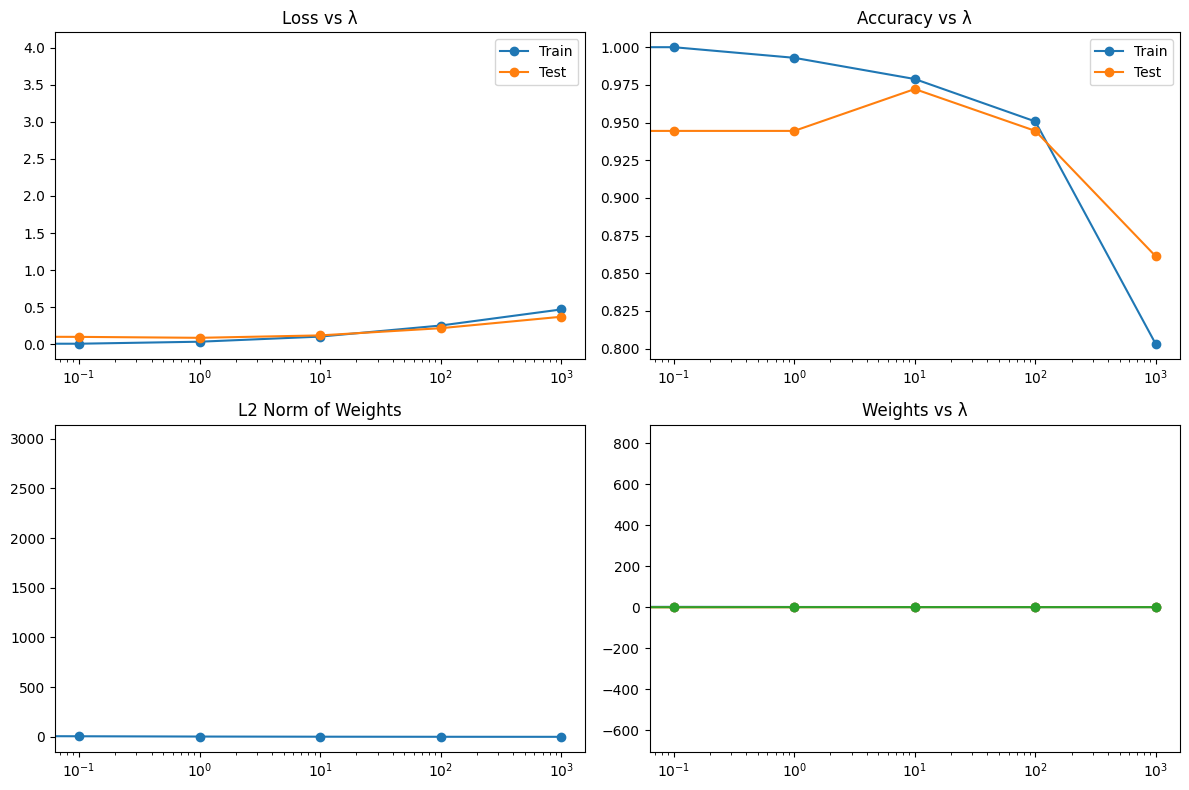

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses, test_losses = [], []
train_accs, test_accs = [], []
norms, weights = [], []

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, max_iter=5000, solver="lbfgs", multi_class="multinomial")
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, max_iter=5000, solver="lbfgs", multi_class="multinomial")
    model.fit(X_train, y_train)

    train_prob = model.predict_proba(X_train)
    test_prob = model.predict_proba(X_test)

    train_losses.append(log_loss(y_train, train_prob))
    test_losses.append(log_loss(y_test, test_prob))
    train_accs.append(accuracy_score(y_train, model.predict(X_train)))
    test_accs.append(accuracy_score(y_test, model.predict(X_test)))
    norms.append(np.linalg.norm(model.coef_))
    weights.append(model.coef_)

# Plots
plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.plot(lambdas, train_losses, marker='o', label="Train"); plt.plot(lambdas, test_losses, marker='o', label="Test"); plt.xscale('log'); plt.legend(); plt.title("Loss vs λ")
plt.subplot(2,2,2); plt.plot(lambdas, train_accs, marker='o', label="Train"); plt.plot(lambdas, test_accs, marker='o', label="Test"); plt.xscale('log'); plt.legend(); plt.title("Accuracy vs λ")
plt.subplot(2,2,3); plt.plot(lambdas, norms, marker='o'); plt.xscale('log'); plt.title("L2 Norm of Weights")
plt.subplot(2,2,4)
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, i, 0], marker='o')  # just first class weights
plt.xscale('log'); plt.title("Weights vs λ")
plt.tight_layout(); plt.show()




In this part, logistic regression models were trained with different values of the regularization parameter λ. To understand the effect of λ, four graphs were plotted: cross-entropy loss, accuracy, L2 norm of the weights, and the individual feature weights. For each graph, the observations and explanations are provided below.



**Graph 1: Cross-Entropy Loss vs λ**  
Observation: When λ is close to zero, the training loss is very small, but the test loss is much higher in comparison. As λ increases slightly, the training loss begins to rise while the test loss decreases. At moderate λ values, the gap between training and test loss is the smallest. However, when λ becomes very large, both training and test losses increase again, with the test loss eventually becoming quite high.  

Explanation: At small λ values, the model is effectively unregularized and can fit the training data extremely closely. This is why the training loss is very low. However, because the model is tuned so tightly to the training examples, it performs poorly on new data, which leads to a higher test loss (overfitting). As λ grows, the regularization discourages overly large weights, which makes the model smoother and less sensitive to noise. This improves generalization, so the test loss decreases. At moderate λ, the model achieves the best balance between fitting the data and generalizing to unseen examples. Beyond this point, if λ is too large, the penalty becomes too strong, and the model cannot learn useful patterns. This leads to both higher training and test losses, which corresponds to underfitting.  



**Graph 2: Accuracy vs λ**  
Observation: Training accuracy is very high when λ is small, often close to perfect classification on the training set. However, the test accuracy is noticeably lower in this region. As λ increases, training accuracy gradually declines, but test accuracy first improves and reaches its highest point at moderate λ values. At very large λ, both training and test accuracy drop significantly, and the model performs poorly on both sets.  

Explanation: The pattern in the accuracy graph mirrors what was seen in the loss graph. With very weak regularization, the model memorizes the training set, leading to artificially high training accuracy but poor test performance because the decision boundary is too complex and tailored to the training data. Increasing λ forces the model to simplify by reducing the magnitude of its weights, which slightly lowers training accuracy but improves test accuracy since the decision boundary now generalizes better. At moderate λ, the test accuracy reaches its maximum, showing the sweet spot where regularization achieves the best balance. When λ is very large, however, the model is over-penalized. The weights shrink too much, the classifier becomes overly simplistic, and both training and test accuracies suffer due to underfitting.  



**Graph 3: L2 Norm of Weights vs λ**  
Observation: The L2 norm of the weight vector is very large when λ is small, showing that the model relies on large coefficients. As λ increases, the norm steadily decreases, and for very large λ, the norm approaches very small values.  

Explanation: This graph directly demonstrates the effect of the L2 regularization term. When λ is close to zero, the model has no restriction on weight size, so it pushes the coefficients to large values to achieve a tight fit to the training data. This is risky, because large weights mean the model is highly sensitive to small changes in the inputs. As λ increases, the L2 penalty prevents the model from using very large coefficients. The weight vector shrinks steadily, making the model more stable and less likely to overfit. When λ is extremely large, the penalty dominates, and the weights shrink close to zero. In this situation, the model essentially ignores most features and fails to capture useful structure, which explains the underfitting observed earlier.  



**Graph 4: Individual Feature Weights vs λ**  
Observation: At small λ values, many feature weights take on large positive or negative values. This means the model is heavily dependent on a variety of features, some of which may not be truly important. As λ increases, the weights for most features shrink toward zero, though some features retain relatively larger weights compared to others. These persistent features remain important even when the regularization is strong.  

Explanation: This graph provides a closer look at how L2 regularization acts on individual features. With little or no regularization, the model assigns strong weights to many features, which may include both genuinely useful features and irrelevant ones capturing noise. As λ grows, the penalty suppresses less useful features by pushing their weights closer to zero. The features that remain strong even at higher λ values are likely the ones that contain the most meaningful information for classification. This shows that L2 regularization not only reduces overfitting but also helps in highlighting which features are consistently important. It acts as a soft form of feature selection: weights are not eliminated entirely but are reduced in proportion to their usefulness under the constraint of the penalty.  



**Overall Interpretation**  
Across all four graphs, we see the same trade-off: with λ = 0, the model overfits, achieving high performance on training data but poor generalization. With very large λ, the model underfits, becoming too simple to perform well. The most interesting behavior happens at moderate values of λ, where the training performance is slightly reduced but the test performance improves, the weights are shrunk to manageable values, and the most important features remain prominent. This demonstrates why tuning λ is critical in logistic regression and how L2 regularization serves as a powerful tool for controlling model complexity.


**(e) Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.**

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Scale to [-10,10]
scaler = MinMaxScaler(feature_range=(-10,10))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

means = np.linspace(-10, 10, 5)

def gaussian_transform(X, sigma):
    blocks = []
    for j in range(X.shape[1]):
        xj = X[:, j].reshape(-1,1)
        block = np.exp(- (xj - means.reshape(1,-1))**2 / (2*sigma**2))
        blocks.append(block)
    return np.hstack(blocks)
sigma = 1.0
Xtr_g = gaussian_transform(X_train_scaled, sigma)
Xte_g = gaussian_transform(X_test_scaled, sigma)

print("Transformed train shape:", Xtr_g.shape)
print("Transformed test shape:", Xte_g.shape)

# Peek at a few rows
print("First row of transformed features:\n", Xtr_g[0][:10])  # first 10 values


Transformed train shape: (142, 65)
Transformed test shape: (36, 65)
First row of transformed features:
 [3.53392571e-31 6.82937941e-11 1.83291793e-01 6.83191964e-03
 3.53655513e-15 1.78696750e-03 3.53216545e-01 9.69624044e-10
 3.69661028e-29 1.95723021e-59]




We use Gaussian basis functions to transform the features into a richer, nonlinear space. First, the features are scaled into the range [-10, 10]. For each feature, five Gaussian functions are defined with centers equally spaced between -10 and 10. The transformed representation replaces each original feature with its responses to these Gaussian curves. The width of the Gaussians is controlled by the parameter σ, which determines how broad or narrow the curves are.

Observation: After applying the transformation, each feature is expanded into five new features, one for each Gaussian center. For example, the original 13 features in the Wine dataset become 65 features after transformation. The transformed feature values range between 0 and 1, with higher values when the original feature is closer to a Gaussian center and lower values when it is farther away.

Explanation: This transformation allows linear models to capture nonlinear relationships. In the original space, logistic regression or linear regression can only separate data with a straight hyperplane. By adding Gaussian basis functions, the model is effectively given curved features that can describe more complex shapes in the data. The parameter σ plays a crucial role: small σ values make very narrow peaks that are highly localized, while large σ values create broader curves that capture general trends. In other words, the Gaussian transformation is a way to increase model flexibility, making it possible to represent patterns that a purely linear model could never capture.


**(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.**

In [8]:
from sklearn.metrics import mean_squared_error

train_err, test_err = [], []

sigmas = [0.1, 0.5, 1, 5, 10]

for sigma in sigmas:
    Xtr_g = gaussian_transform(X_train_scaled, sigma)
    Xte_g = gaussian_transform(X_test_scaled, sigma)
    reg = LinearRegression().fit(Xtr_g, y_train)
    train_err.append(mean_squared_error(y_train, reg.predict(Xtr_g)))
    test_err.append(mean_squared_error(y_test, reg.predict(Xte_g)))

print("Train errors:", train_err)
print("Test errors:", test_err)


Train errors: [0.22651040918636367, 0.10155083928923013, 0.0492119149641674, 0.022615048132685008, 0.02339800378620264]
Test errors: [2.2506128020300675, 0.37810230757830793, 0.18593050407916878, 0.30105506736281074, 3.141254361471552]


Part (c) Train MSE: 0.0533927669361334
Part (c) Test MSE: 0.10855333833246528


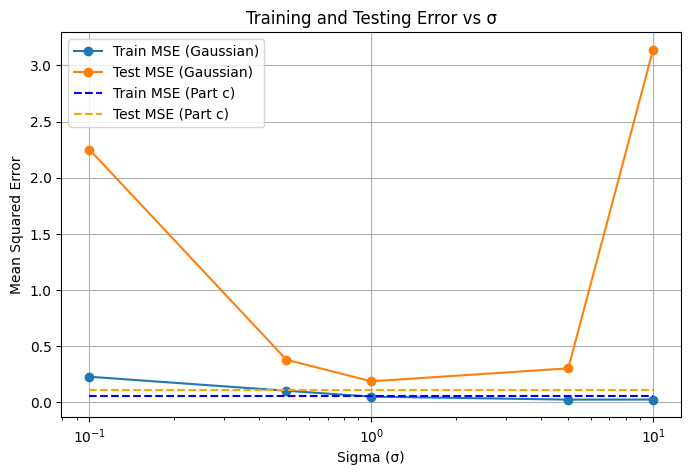

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Compute Part (c) errors (linear regression on original features)
reg = LinearRegression().fit(X_train_scaled, y_train)
train_err_c = mean_squared_error(y_train, reg.predict(X_train_scaled))
test_err_c = mean_squared_error(y_test, reg.predict(X_test_scaled))

print("Part (c) Train MSE:", train_err_c)
print("Part (c) Test MSE:", test_err_c)

#  Gaussian basis regression errors
sigmas = [0.1, 0.5, 1, 5, 10]
train_err, test_err = [], []

for sigma in sigmas:
    Xtr_g = gaussian_transform(X_train_scaled, sigma)
    Xte_g = gaussian_transform(X_test_scaled, sigma)

    reg_g = LinearRegression().fit(Xtr_g, y_train)
    train_err.append(mean_squared_error(y_train, reg_g.predict(Xtr_g)))
    test_err.append(mean_squared_error(y_test, reg_g.predict(Xte_g)))

#  Plot
plt.figure(figsize=(8,5))

# Gaussian errors
plt.plot(sigmas, train_err, marker='o', label='Train MSE (Gaussian)')
plt.plot(sigmas, test_err, marker='o', label='Test MSE (Gaussian)')

# Constant lines for part (c)
plt.hlines(train_err_c, xmin=min(sigmas), xmax=max(sigmas), colors='blue', linestyles='dashed', label='Train MSE (Part c)')
plt.hlines(test_err_c, xmin=min(sigmas), xmax=max(sigmas), colors='orange', linestyles='dashed', label='Test MSE (Part c)')

plt.xscale('log')
plt.xlabel('Sigma (σ)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Error vs σ')
plt.legend()
plt.grid(True)
plt.show()




In this experiment, Gaussian basis functions are applied with different σ values. A simple linear regression model is trained on the transformed features, and the mean squared error (MSE) is calculated on both training and test sets for each choice of σ. The goal is to understand how the width of the Gaussian functions affects performance.

Observation: When σ is very small (for example, 0.1), the training error is extremely low, but the test error is much higher. This shows that the model fits the training data almost perfectly but generalizes poorly. As σ increases to moderate values (like 1 or 5), the training error rises slightly, while the test error decreases, reaching its lowest point. At very large σ values (such as 10), both training and test errors increase significantly, showing that the model is no longer capturing enough detail.

Explanation: Small σ values produce very narrow Gaussian functions that act like spikes centered on individual data points. The model can then memorize the training set, which is why the training error becomes very low. However, this also makes the model extremely sensitive to small changes, leading to overfitting and poor generalization on new data. At very large σ values, the Gaussians become so broad that they lose the ability to capture useful structure, and the model reduces to something close to a simple linear regression on smoothed features. This explains the high training and test errors in that regime, which corresponds to underfitting. The best results appear for moderate σ values, where the basis functions capture enough nonlinearity to improve the model while still being smooth enough to generalize well. This experiment clearly illustrates the bias-variance tradeoff: small σ gives low bias but high variance, large σ gives high bias but low variance, and moderate σ provides the best balance.


**(g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.**

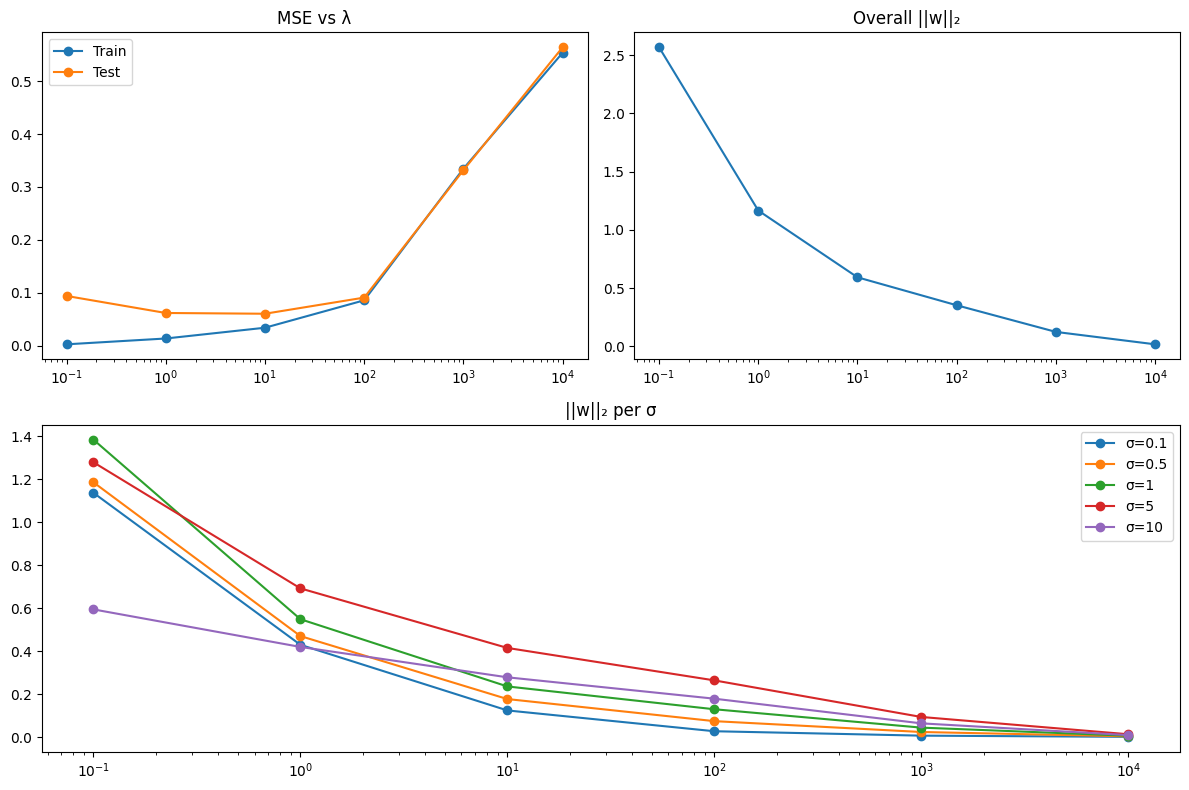

In [12]:
from sklearn.linear_model import Ridge

def full_transform(X, sigmas=[0.1,0.5,1,5,10]):
    return np.hstack([gaussian_transform(X,s) for s in sigmas])

Xtr_full = full_transform(X_train_scaled)
Xte_full = full_transform(X_test_scaled)

lambdas = [0.1, 1, 10, 100, 1000, 10000]
train_mse, test_mse, norms = [], [], []
sigma_norms = {s: [] for s in sigmas}
group_size = X_train.shape[1] * 5

for lam in lambdas:
    model = Ridge(alpha=lam).fit(Xtr_full, y_train)
    train_mse.append(mean_squared_error(y_train, model.predict(Xtr_full)))
    test_mse.append(mean_squared_error(y_test, model.predict(Xte_full)))
    norms.append(np.linalg.norm(model.coef_))
    start=0
    for s in sigmas:
        group_w = model.coef_[start:start+group_size]
        sigma_norms[s].append(np.linalg.norm(group_w))
        start+=group_size

plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.plot(lambdas, train_mse, marker='o', label="Train"); plt.plot(lambdas, test_mse, marker='o', label="Test"); plt.xscale("log"); plt.legend(); plt.title("MSE vs λ")
plt.subplot(2,2,2); plt.plot(lambdas, norms, marker='o'); plt.xscale("log"); plt.title("Overall ||w||₂")
plt.subplot(2,1,2)
for s in sigmas: plt.plot(lambdas, sigma_norms[s], marker='o', label=f"σ={s}")
plt.xscale("log"); plt.legend(); plt.title("||w||₂ per σ")
plt.tight_layout(); plt.show()






Observation 1: The MSE vs λ plot shows that training error increases steadily with λ, while the test error first decreases and then increases. At small λ, the training error is low but the test error is high, which shows overfitting. At moderate λ, the test error drops and reaches its minimum, showing the best generalization. At very large λ, both training and test errors increase, which means the model is underfitting.  

Observation 2: The overall L2 norm of the weight vector decreases as λ increases. For small λ, the norm is very large, which means the model uses big coefficients to fit the data. As λ grows, the weights shrink smoothly, and at large λ values the norm becomes very small.  

Observation 3: When looking at the norms of weights grouped by σ values, it becomes clear that the small-σ basis functions (the very narrow Gaussians) are penalized more heavily as λ grows. Their weights shrink quickly. The broader Gaussians (large σ) retain more of their weight under regularization.

Explanation: These results highlight how L2 regularization not only reduces overfitting but also controls which types of features remain influential. At small λ, the model overfits by using many narrow Gaussian functions to memorize the training set. Regularization counteracts this by shrinking coefficients, especially those of the small-σ features that tend to overfit. This is why their norms drop the fastest. Larger-σ features, which represent smoother trends in the data, remain more important under strong regularization. At very large λ, however, even these are suppressed, and the model underfits.  

In summary, combining Gaussian basis functions of different widths with L2 regularization creates a very flexible model, but one that requires careful tuning of λ. Proper regularization allows the model to automatically favor smoother features that generalize well, while discouraging overly localized features that lead to overfitting.


**(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own).**

So far, we’ve applied Gaussian basis functions to each feature individually. This means each function only captures patterns in a single variable, like “alcohol content around 10” or “flavanoids close to 2.” While this can be useful, it completely ignores interactions between features. In real-world data, many effects depend on combinations of variables. For example, in the wine dataset, the impact of alcohol on wine quality might depend on acidity. To capture these kinds of interactions, we need basis functions that consider multiple features at once.

One way to do this is by using multivariate Gaussian functions. In this case, each basis function depends on two or more features together. A simple two-dimensional Gaussian might look like this:

**ϕ(x)=exp(−2σ2(xi​−μi​)2​−2σ2(xj​−μj​)2​)**

This function only “activates” when both
𝑥
𝑖
x
i
	​

 and
𝑥
𝑗
x
j
	​

 are close to their respective centers. By using such functions, the model can capture patterns like “high alcohol and low acidity” or “medium flavanoids and high color intensity.” We can even extend this idea to three or more features if needed.

The benefit is that the model becomes much more expressive. It’s no longer limited to single-variable effects—it can represent complex interactions between features. This reduces bias, meaning the model can fit more complex patterns. However, the downside is that the number of basis functions grows quickly. More functions mean more parameters to learn, which increases the model’s flexibility but also its tendency to overfit the training data. In other words, variance goes up.

So, in short, designing Gaussian basis functions that capture relationships between inputs makes the model richer and more powerful, but it also makes it more prone to overfitting. To handle this, we would need either more training data or stronger regularization.

**(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, μi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative.**

In [13]:


X1 = X_train_scaled[:,0]
y1 = y_train

mu = np.linspace(-10,10,5)  # initial centers
sigma = 1.0
w = np.random.randn(5)

lr_mu = 0.01
lr_w = 0.01

for it in range(100):
    Phi = np.exp(-(X1.reshape(-1,1) - mu.reshape(1,-1))**2 / (2*sigma**2))
    y_pred = Phi.dot(w)

    grad_w = -2*Phi.T.dot(y1 - y_pred) + 2*0.1*w
    w -= lr_w * grad_w

    error = y1 - y_pred
    for j in range(len(mu)):
        phi_j = Phi[:,j]
        grad_mu = -2*w[j]*np.sum(error * phi_j * (X1 - mu[j]))/sigma**2
        mu[j] -= lr_mu * grad_mu

print("Learned centers µ:", mu)


Learned centers µ: [-7.46212912 -3.86951733 -0.81748762  2.61894479 10.0287863 ]


Input:

Training data:
𝑋
1
,
𝑦
1
X
1
	​

,y
1
	​


Number of Gaussian centers:
𝐾
K

Initial centers:
𝜇
1
,
…
,
𝜇
𝐾
μ
1
	​

,…,μ
K
	​


Initial weights:
𝑤
1
,
…
,
𝑤
𝐾
w
1
	​

,…,w
K
	​


Gaussian width:
𝜎
σ

Learning rates:
𝜂
𝜇
,
𝜂
𝑤
η
μ
	​

,η
w
	​


Number of iterations: max_iter

Regularization parameter:
𝜆
λ

Output:

Optimized centers
𝜇
1
,
,
𝜇
𝐾
μ
1
	​

,…,μ
K
	​


Optimized weights
𝑤
1
,
,
𝑤
𝐾
w
1
	​

,,w
K
	​


Explanation:
Instead of fixing Gaussian centers, we let them move to match the data.

Alternate updates:

Update weights w (linear regression step).

Update centers µ (gradient step).

Over time, centers shift towards regions that explain the data better.
This makes the model more adaptive, similar to RBF networks.

**(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?
Explain your answer.**

Explanation:

The w-step (solving for linear weights) is convex, so it always finds the global optimum for a fixed set of Gaussian centers (µ).

The µ-step (optimizing Gaussian centers) is non-convex, so it only guarantees convergence to a local optimum.

The algorithm typically converges to a stable solution, but the quality of the solution depends on the initialization of µ.

Practical Tips:

Use multiple random initializations for µ to improve the chance of better solutions.

Use a small learning rate when updating µ to maintain stability.

Apply regularization on w to avoid instability or overfitting.

Conclusion:

This method is effective and usually converges, but it is not guaranteed to find the global optimum due to the non-convexity of the µ-step.

**2. Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and
logistic regression (CLASSIFICATION) along with complete data preprocessing steps.
Note: You should not show your lab practices for this question.**

A. Linear Regression (Regression Task)

Dataset: California Housing Dataset

In [15]:

#  Import Libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load Data
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Ordinary Linear Regression (No Regularization)
reg = LinearRegression().fit(X_train_scaled, y_train)
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

print("=== LINEAR REGRESSION (No Regularization) ===")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

#  Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

print("\n=== RIDGE REGRESSION (L2 Regularization) ===")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_ridge))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_ridge))
print("Train R²:", r2_score(y_train, y_train_pred_ridge))
print("Test R²:", r2_score(y_test, y_test_pred_ridge))

#  Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_train_scaled, y_train)
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

print("\n=== LASSO REGRESSION (L1 Regularization) ===")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_lasso))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_lasso))
print("Train R²:", r2_score(y_train, y_train_pred_lasso))
print("Test R²:", r2_score(y_test, y_test_pred_lasso))


=== LINEAR REGRESSION (No Regularization) ===
Train MSE: 0.5179331255246699
Test MSE: 0.5558915986952442
Train R²: 0.6125511913966952
Test R²: 0.575787706032451

=== RIDGE REGRESSION (L2 Regularization) ===
Train MSE: 0.5179332184751891
Test MSE: 0.5558548589435971
Train R²: 0.6125511218634558
Test R²: 0.5758157428913684

=== LASSO REGRESSION (L1 Regularization) ===
Train MSE: 0.52338408362522
Test MSE: 0.5482548967938964
Train R²: 0.6084735081636228
Test R²: 0.5816154300698727


B. Logistic Regression (Regression Task)

Dataset: Breat cancer dataset


=== LOGISTIC REGRESSION (L2 (Ridge)) ===
Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Top Features by Coefficient:
                 Feature  Coefficient
21         worst texture    -1.335651
10          radius error    -1.283117
28        worst symmetry    -1.196087
7    mean concave points    -1.130510
13            area error    -0.944861
26       worst concavity    -0.942150
23            worst area    -0.882949
20          worst radius    -0.881042
6         mean concavity    -0.818323
27  worst concave points    -0.766904
Intercept: [0.36442047]


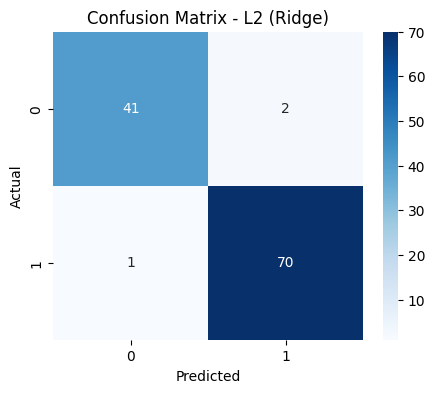


=== LOGISTIC REGRESSION (L1 (Lasso)) ===
Train Accuracy: 0.989010989010989
Test Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Top Features by Coefficient:
                Feature  Coefficient
23           worst area    -3.152409
10         radius error    -2.467026
7   mean concave points    -2.440384
21        worst texture    -1.852987
26      worst concavity    -1.295003
28       worst symmetry    -1.036541
15    compactness error     0.889211
20         worst radius    -0.732497
18       symmetry error     0.464756
14     smoothness error    -0.433317
Intercept: [0.]


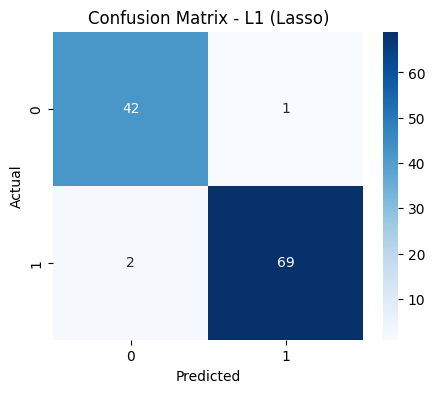


=== LOGISTIC REGRESSION (ElasticNet) ===
Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Top Features by Coefficient:
                 Feature  Coefficient
10          radius error    -1.520852
21         worst texture    -1.451636
7    mean concave points    -1.327899
28        worst symmetry    -1.150919
20          worst radius    -1.030437
23            worst area    -0.918560
13            area error    -0.880263
26       worst concavity    -0.865871
27  worst concave points    -0.800963
15     compactness error     0.715614
Intercept: [0.37500947]


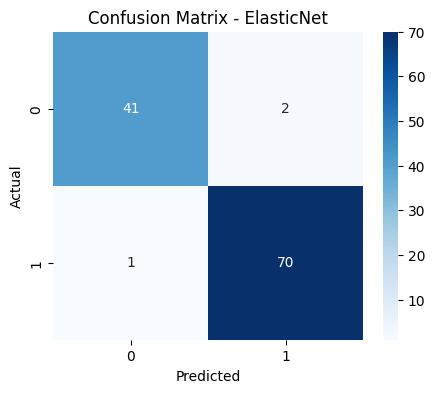

In [16]:

#  Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  Load Data
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Variants
variants = {
    "L2 (Ridge)": LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000),
    "L1 (Lasso)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
}

for name, clf in variants.items():
    clf.fit(X_train_scaled, y_train)
    y_train_pred = clf.predict(X_train_scaled)
    y_test_pred = clf.predict(X_test_scaled)

    print(f"\n=== LOGISTIC REGRESSION ({name}) ===")

    #  Accuracy and Classification
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    #  Model Coefficients & Intercept
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': clf.coef_[0]
    }).sort_values(by='Coefficient', key=abs, ascending=False)

    print("\nTop Features by Coefficient:")
    print(coef_df.head(10))  # Show top 10 features

    print("Intercept:", clf.intercept_)

    #  Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
